# Exploration de donnés avec du texte et des dates (text preprocessing & time series)

In [ ]:
TO DO - > extraire tweets avec # avengers et adapt exercices ? 

Objectif du cours:
- Arriver à manipuler du format texte en python
- Arriver à manipuler les formats de date en python 
- Appliquer les compétences travaillés dans le cours 1 et 2 pour extraires des informations d'un dataset

## Partie 1 - Charger et Explorer le data set

Grâce aux connaissances et compétences que vous avez acquis dans les 2 derniers cours, à vous de charger le datset suivant https://www.kaggle.com/kavita5/twitter-dataset-avengersendgame et de le manipuler en autonomie pour répondre aux questions ci-dessous.

**Exercice:** 
- Que représnte chaque colonne ?
- Quel est la type de variable de chaque colonne ?
- Affichez le texte d'un vingtaine de tweets ?

## Partie 2 - Le format de date

https://towardsdatascience.com/working-with-datetime-in-pandas-dataframe-663f7af6c587

In [ ]:
Librairie datetime en python 

In [1]:
from datetime import date

In [19]:
#Afficher la date d'ajd
d1 = date.today() 
d1

datetime.date(2021, 8, 26)

In [20]:
print('Date d\'aujourd\'hui :', d1)
# day
print('Day :',d1.day)
# month
print('Month :',d1.month)
# year
print('Year :',d1.year)

Date d'aujourd'hui : 2021-08-26
Day : 26
Month : 8
Year : 2021


In [21]:
from datetime import time

In [27]:
t1 = time(13,20,13)
print('Hour :',t1.hour)
# minute
print('Minute :',t1.minute)
# second
print('Second :',t1.second)

Hour : 13
Minute : 20
Second : 13


In [28]:
from datetime import datetime
dt1 = datetime(2020,4,23,11,20,30)
print(dt1)
print('Date :',dt1.date())
# time
print('Time :',dt1.time())

2020-04-23 11:20:30
Date : 2020-04-23
Time : 11:20:30


In [31]:
dt2 = datetime.now()
# week starts from 0
print(dt2.weekday()) # output 3 for Thursday
# week starts with 1
print(dt2.isoweekday()) # output 4 in ISO format

3
4


In [32]:
#convert date to string 
d1 = datetime.now()
print('Datetime object :',d1)
new_date = d1.strftime('%d/%m/%Y %H:%M')
print('Formatted date :',new_date)
print(type(new_date))

Datetime object : 2021-08-26 20:13:40.303235
Formatted date : 26/08/2021 20:13
<class 'str'>


In [33]:
#convert string to date 
date = '22 April, 2020 13:20:13'
d1 = datetime.strptime(date,'%d %B, %Y %H:%M:%S')
print(d1)
print(type(d1))

2020-04-22 13:20:13
<class 'datetime.datetime'>


Vous pouvez consulter tous les codes pour les formats de date sur le lien suivant: https://strftime.org

Les formats de date avec pandas: 
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html 
- https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.html

In [69]:
import pandas as pd

In [70]:
df = pd.DataFrame({'year': [2015, 2016], 'month': [2, 3], 'day': [4, 5]})
df

,year,month,day
0,2015,2,4
1,2016,3,5


In [71]:
pd.to_datetime(df) #On peut également préciser le format de conversion si celui ci est plus complexe, ou bien laisser pandas inférer lui même le format

0   2015-02-04
1   2016-03-05
dtype: datetime64[ns]

In [72]:
df['date']= pd.to_datetime(df)

In [73]:
df

,year,month,day,date
0,2015,2,4,2015-02-04
1,2016,3,5,2016-03-05


In [76]:
df['day of week']=df['date'].dt.dayofweek #Les méthodes dt.year, dt
df

,year,month,day,date,day of week
0,2015,2,4,2015-02-04,2
1,2016,3,5,2016-03-05,5


**Exercices:**
- Quel est la date et l'heure du tweet le plus récent ?
- Quel est la date et l'heure du tweet le plus ancien ?
- Faites un graphique affichant le nombre de tweets par jour
- A quelle h de la journée y a t'il le plus de tweets ?
- A quelle h de la journée y a t'il le moins de tweets ?
- Quel jour de la semaine y a t'il le plus de tweets ?
- Quel jour de la semaine y t'il le moins de tweets ?

In [ ]:
#Votre code

Pour aller plus loin:
- https://docs.python.org/3/library/datetime.html
- https://towardsdatascience.com/working-with-datetime-in-pandas-dataframe-663f7af6c587
- https://www.analyticsvidhya.com/blog/2020/05/datetime-variables-python-pandas/

## Partie 3 - NLP 

Prenons un texte exemple sur lequel nous allons effectuer des opérations de preprocessing de texte.

In [1]:
phrase = "Bonjour je suis une phrase exemple avec des #Hastags et des @arobases et aussi 1 nombre, 2 nombres,... 2118328 nombres etc. J'ai aussi beaucoup ! de carctères $ spéciaux ?!" 

In [2]:
#Lowercase
phrase_lowercase = phrase.lower()
phrase_lowercase

"bonjour je suis une phrase exemple avec des #hastags et des @arobases et aussi 1 nombre, 2 nombres,... 2118328 nombres etc. j'ai aussi beaucoup ! de carctères $ spéciaux ?!"

In [3]:
#Extraire la ponctuation
import re
phrase_sans_ponctuation = re.sub("[',!?.]", " ", phrase_lowercase)
phrase_sans_ponctuation

'bonjour je suis une phrase exemple avec des #hastags et des @arobases et aussi 1 nombre  2 nombres     2118328 nombres etc  j ai aussi beaucoup   de carctères $ spéciaux   '

In [4]:
#Extraire les nombres
phrase_sans_nombre = re.sub("[0-9]", " ", phrase_sans_ponctuation)
phrase_sans_nombre

'bonjour je suis une phrase exemple avec des #hastags et des @arobases et aussi   nombre    nombres             nombres etc  j ai aussi beaucoup   de carctères $ spéciaux   '

In [5]:
#Extraire les caractères spéciaux
phrase_sans_caractère_spéciaux = re.sub("[$]", " ", phrase_sans_nombre)
phrase_sans_caractère_spéciaux

'bonjour je suis une phrase exemple avec des #hastags et des @arobases et aussi   nombre    nombres             nombres etc  j ai aussi beaucoup   de carctères   spéciaux   '

In [6]:
#Extraire une liste de mots
liste_mots = phrase_sans_caractère_spéciaux.split()
liste_mots

['bonjour',
 'je',
 'suis',
 'une',
 'phrase',
 'exemple',
 'avec',
 'des',
 '#hastags',
 'et',
 'des',
 '@arobases',
 'et',
 'aussi',
 'nombre',
 'nombres',
 'nombres',
 'etc',
 'j',
 'ai',
 'aussi',
 'beaucoup',
 'de',
 'carctères',
 'spéciaux']

In [7]:
#extraire les #Hastags et @mentions
liste_hastags_mentions = []
liste_mots_pure = []
for i in liste_mots:
    if i[0] == "#" or i[0] == "@":
        liste_hastags_mentions.append(i)
    else:
        liste_mots_pure.append(i)
print(liste_hastags_mentions)    
print(liste_mots_pure)

['#hastags', '@arobases']
['bonjour', 'je', 'suis', 'une', 'phrase', 'exemple', 'avec', 'des', 'et', 'des', 'et', 'aussi', 'nombre', 'nombres', 'nombres', 'etc', 'j', 'ai', 'aussi', 'beaucoup', 'de', 'carctères', 'spéciaux']


In [8]:
#Enlever les stop words
import nltk
from nltk.corpus import stopwords
print(stopwords.words('french'))

['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle', 'en', 'et', 'eux', 'il', 'ils', 'je', 'la', 'le', 'les', 'leur', 'lui', 'ma', 'mais', 'me', 'même', 'mes', 'moi', 'mon', 'ne', 'nos', 'notre', 'nous', 'on', 'ou', 'par', 'pas', 'pour', 'qu', 'que', 'qui', 'sa', 'se', 'ses', 'son', 'sur', 'ta', 'te', 'tes', 'toi', 'ton', 'tu', 'un', 'une', 'vos', 'votre', 'vous', 'c', 'd', 'j', 'l', 'à', 'm', 'n', 's', 't', 'y', 'été', 'étée', 'étées', 'étés', 'étant', 'étante', 'étants', 'étantes', 'suis', 'es', 'est', 'sommes', 'êtes', 'sont', 'serai', 'seras', 'sera', 'serons', 'serez', 'seront', 'serais', 'serait', 'serions', 'seriez', 'seraient', 'étais', 'était', 'étions', 'étiez', 'étaient', 'fus', 'fut', 'fûmes', 'fûtes', 'furent', 'sois', 'soit', 'soyons', 'soyez', 'soient', 'fusse', 'fusses', 'fût', 'fussions', 'fussiez', 'fussent', 'ayant', 'ayante', 'ayantes', 'ayants', 'eu', 'eue', 'eues', 'eus', 'ai', 'as', 'avons', 'avez', 'ont', 'aurai', 'auras', 'aura', 'aurons', 'aur

In [9]:
liste_mots_sans_stopwords = [i for i in liste_mots_pure if i not in stopwords.words('french')]
liste_mots_sans_stopwords

['bonjour',
 'phrase',
 'exemple',
 'aussi',
 'nombre',
 'nombres',
 'nombres',
 'etc',
 'aussi',
 'beaucoup',
 'carctères',
 'spéciaux']

In [10]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [11]:
#stemming
import nltk
from nltk.stem.porter import PorterStemmer

porter_stemmer  = PorterStemmer()
for i in liste_mots_sans_stopwords:
    print(porter_stemmer.stem(i))

bonjour
phrase
exempl
aussi
nombr
nombr
nombr
etc
aussi
beaucoup
carctèr
spéciaux


In [14]:
#lemming
import nltk
#nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

for i in liste_mots_sans_stopwords:
    print(wordnet_lemmatizer.lemmatize(i))

bonjour
phrase
exemple
aussi
nombre
nombres
nombres
etc
aussi
beaucoup
carctères
spéciaux


In [99]:
#compter la fréquence des mots
for i in set(liste_mots_sans_stopwords):
    print(i, liste_mots_sans_stopwords.count(i))  

uen 1
nombres 2
exemple 1
etc 1
phrase 1
carctères 1
beaucoup 1
spéciaux 1
bonjour 1
aussi 2
nombre 1


In [100]:
from collections import Counter
counts = Counter(liste_mots_sans_stopwords)
counts

Counter({'bonjour': 1,
         'uen': 1,
         'phrase': 1,
         'exemple': 1,
         'aussi': 2,
         'nombre': 1,
         'nombres': 2,
         'etc': 1,
         'beaucoup': 1,
         'carctères': 1,
         'spéciaux': 1})

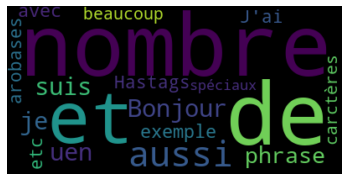

In [104]:
#wordclouds
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud().generate(phrase)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Exercice**: Quels sont les 20 mots les plus fréquents dans tous les tweets que nous avons ?

## Partie 4 - A vous de jouer ! 

**Grâce aux thèmes abordés aujourd'hui et dans les cours précédents, essayez d'extraire au moins 3 informations que vous considerez intéréssantes sur le dataset des tweets et accompagnez ces informations avec un graphique **

In [ ]:
#Votre code